# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [ ]:
tab = pd.crosstab(df["sex"] , df["flag_doente"], margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [ ]:
# Quantidade média de doentes:

tab["média_doentes"] = round((tab.mean(axis=1)),2)
tab

flag_doente,0,1,All,média_doentes
sex,,,,
0.0,72,25,97,71.67
1.0,92,114,206,126.17
All,164,139,303,174.67


In [ ]:
tab["Odds"] = round((tab[1] / tab[0]), 2)
tab

flag_doente,0,1,All,média_doentes,Odds
sex,,,,,
0.0,72,25,97,71.67,0.35
1.0,92,114,206,126.17,1.24
All,164,139,303,174.67,0.85


In [ ]:
tab["Odds_ratio"] = round((tab.loc["All", "Odds"] / tab["Odds"]),2)
tab

flag_doente,0,1,All,média_doentes,Odds,Odds_ratio
sex,,,,,,
0.0,72,25,97,71.67,0.35,2.43
1.0,92,114,206,126.17,1.24,0.69
All,164,139,303,174.67,0.85,1.00


In [ ]:
tab["Log_Odds"] = round(np.log(tab[1] / tab[0]),2)
tab

flag_doente,0,1,All,média_doentes,Odds,Odds_ratio,Log_Odds
sex,,,,,,,
0.0,72,25,97,71.67,0.35,2.43,-1.06
1.0,92,114,206,126.17,1.24,0.69,0.21
All,164,139,303,174.67,0.85,1.00,-0.17


In [ ]:
tab['Log_Odds_ratio'] = round((tab['Log_Odds'] / tab.loc["All", "Log_Odds"]))
tab

flag_doente,0,1,All,média_doentes,Odds,Odds_ratio,Log_Odds,Log_Odds_ratio
sex,,,,,,,,
0.0,72,25,97,71.67,0.35,2.43,-1.06,6.0
1.0,92,114,206,126.17,1.24,0.69,0.21,-1.0
All,164,139,303,174.67,0.85,1.00,-0.17,1.0


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [ ]:
# Categorizando as idades em 5 grupos diferentes, conforme
# a uma faixa de idades.

# Define os intervalos de idade
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['0-30', '31-40', '41-50', '51-60', '61+']

# Adiciona uma nova coluna 'age_group' ao DataFrame
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,61+
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,61+
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,61+
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,31-40
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,41-50


In [ ]:
tab2 = pd.crosstab(df['age_group'], df['flag_doente'], margins=True)
tab2

flag_doente,0,1,All
age_group,,,
0-30,1,0,1
31-40,10,4,14
41-50,50,22,72
51-60,65,60,125
61+,38,53,91
All,164,139,303


In [ ]:
tab2 = tab2.assign(
    media_doentes=lambda x: round(x.mean(axis=1), 2),
    Odds=lambda x: round(x[1] / x[0], 2),
    Odds_ratio=lambda x: round(x.loc["All", "Odds"] / x["Odds"], 2),
    Log_Odds=lambda x: round(np.log(x[1] / x[0]), 2),
    Log_Odds_ratio=lambda x: round(x['Log_Odds'] / x.loc["All", "Log_Odds"])
)

tab2

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,Log_Odds,Log_Odds_ratio
age_group,,,,,,,,
0-30,1,0,1,NaN,0.00,inf,-inf,inf
31-40,10,4,14,5.01,0.40,2.12,-0.92,5.0
41-50,50,22,72,21.92,0.44,1.93,-0.82,5.0
51-60,65,60,125,36.71,0.92,0.92,-0.08,0.0
61+,38,53,91,26.59,1.39,0.61,0.33,-2.0
All,164,139,303,88.75,0.85,1.00,-0.17,1.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<ipython-input-41-c877de984ecd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_group", y="flag_doente",data=df, ci=None)


<Axes: xlabel='age_group', ylabel='flag_doente'>

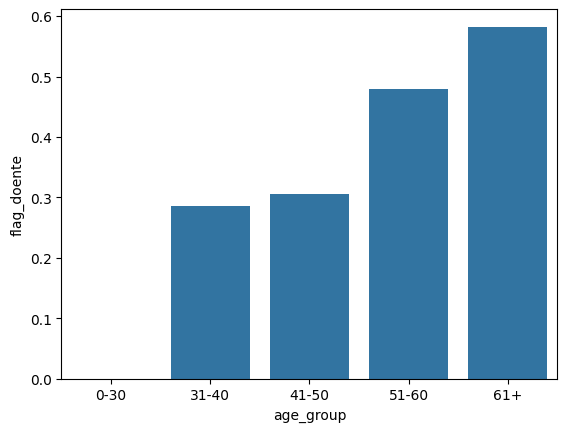

In [ ]:
# Criando gráficos que me permitam visualizar os dados, relacionando
# a presença da doença e suas chances de aparecer conforme as respectivas
# faixas de idade.

sns.barplot(x="age_group", y="flag_doente",data=df, ci=None)

<ipython-input-45-d1ae1436efb0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_group", y="Odds",data=tab2, ci=None)


<Axes: xlabel='age_group', ylabel='Odds'>

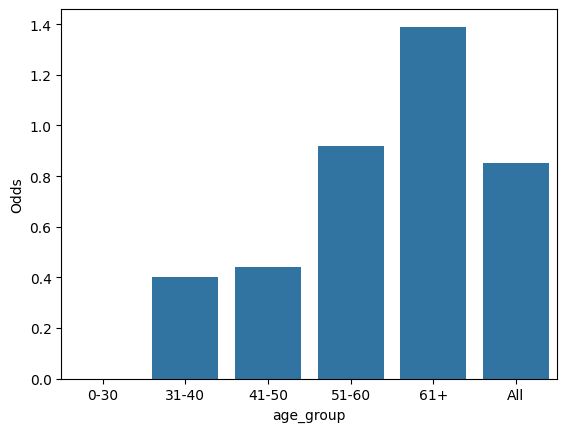

In [ ]:
sns.barplot(x="age_group", y="Odds",data=tab2, ci=None)

<ipython-input-46-7850e0298c35>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_group", y="media_doentes",data=tab2, ci=None)


<Axes: xlabel='age_group', ylabel='media_doentes'>

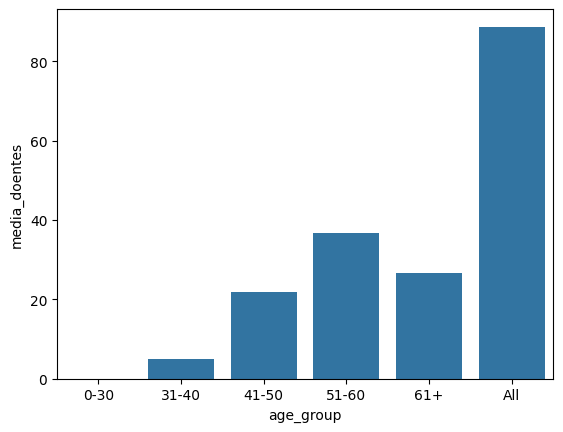

In [ ]:
sns.barplot(x="age_group", y="media_doentes",data=tab2, ci=None)